# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [125]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [2]:
import numpy as np

def design_matrix(x, m):
    n = len(x)
    D = np.zeros((n, m+1)) 
    for i in range(n):
        for j in range(m+1):
            D[i][j] = x[i]**j
    return D
    

In [3]:
x_test = [1,2,3,4, 5]
D = design_matrix(x_test, 3)
D

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [4]:
D = design_matrix(x, 3)
A = D.T @ D
b = D.T @ y
beta = np.linalg.solve(A, b)
beta

array([ 0.49483598, -0.26983377, -2.01973166,  1.01540301])

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [5]:
n = len(x)
for m in range(1, n): 
    D = design_matrix(x, m)
    summ = 0
    for k in range(n):
        A = D.T @ D
        b = D.T @ y
        beta = np.linalg.solve(A, b)
        Pm_xk = D[k] @ beta #k-th row of design matrix times vector of coefficients == P_m(x_k)
        summ += (Pm_xk - y[k])**2
    disp_m = (1/(n-m)) * summ 
    print("Dispersion on m = " + str(m) + ": " + str(disp_m))

Dispersion on m = 1: 4.450215866706205
Dispersion on m = 2: 2.4534269975791783
Dispersion on m = 3: 0.01247089909973165
Dispersion on m = 4: 0.012460407583510042
Dispersion on m = 5: 0.012600059280330578
Dispersion on m = 6: 0.011590813700606611
Dispersion on m = 7: 0.012289041756436829
Dispersion on m = 8: 0.01156937152473263
Dispersion on m = 9: 0.012931045181871444
Dispersion on m = 10: 0.014257919592393146
Dispersion on m = 11: 0.005379407710001037
Dispersion on m = 12: 0.007129050690130868
Dispersion on m = 13: 0.01004848402645803
Dispersion on m = 14: 0.02000394654981088


It seems that dispersion stabilizes at ~0.012. I will take $ \sigma_m^2 = 0.012$  and  $m = 3$


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

We need to take different to get visually different plots. Let's take m = 3, m = 4 and m = 11

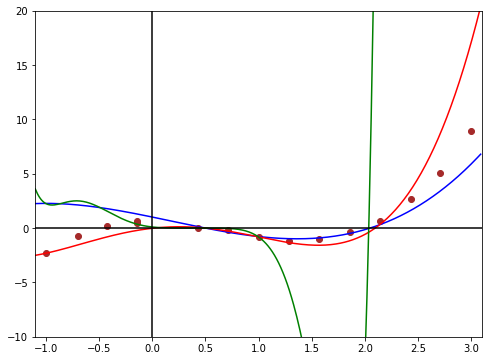

In [9]:
import matplotlib.pyplot as plt

ams = [3, 4, 11]
polynomials = []
n = len(x)
for m in ams: 
    D = design_matrix(x, m)
    A = D.T @ D
    b = D.T @ y
    beta = np.linalg.solve(A, b)
    p = np.poly1d(beta)
    polynomials.append(p)

pol3 = polynomials[0]
pol4 = polynomials[1]
pol11 = polynomials[2]

x_s = np.arange(-1.1, 3.1, 0.01)
p3_vals = [pol3(xi) for xi in x_s]
p4_vals = [pol4(xi) for xi in x_s]
p11_vals = [pol11(xi) for xi in x_s]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_s, p3_vals , color = 'blue')
ax.plot(x_s, p4_vals, color = 'red')
ax.plot(x_s, p11_vals, color = 'green')
ax.scatter(x, y, color = 'brown')
plt.ylim(-10, 20)  
plt.xlim(-1.1, 3.1)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

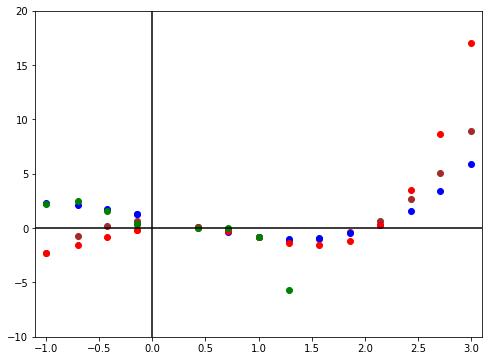

In [7]:
pol3_scatter = [pol3(xk) for xk in x]
pol4_scatter = [pol4(xk) for xk in x]
pol11_scatter = [pol11(xk) for xk in x]
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x, y, color = 'brown')
ax.scatter(x, pol3_scatter, color = 'blue')
ax.scatter(x, pol4_scatter, color = 'red')
ax.scatter(x, pol11_scatter, color = 'green')
plt.ylim(-10, 20)  
plt.xlim(-1.1, 3.1)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

The visual comparison is somewhat consistent with the optimal value of $m$

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [10]:
m = 3

D = design_matrix(x, m)
Q, R = np.linalg.qr(D, mode = 'complete')
y_new = Q.T @ y
f = y_new[0:m+1]
R1 = R[0:m+1]
beta1 = np.linalg.solve(R1, f)
beta1

array([ 0.49483598, -0.26983377, -2.01973166,  1.01540301])

Let's check that both ways give us the same beta-vector. 

In [11]:
D = design_matrix(x, m)
A = D.T @ D
b = D.T @ y
beta2 = np.linalg.solve(A, b)
beta2

array([ 0.49483598, -0.26983377, -2.01973166,  1.01540301])

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [156]:
f = lambda x: (x**2)*np.cos(x)
arr = []
for i in range(5):
    arr.append(np.linspace(np.pi/2, np.pi, i+1)) #starting with 3 points (1 + ends of the interval), ending with 7

In [157]:
def lagrange_k(x, k, xval):
    prod = 1
    for x_i in x:
        if x_i == x[k]:
            continue
        else:
            prod *= (xval - x_i)/(x[k] - x_i)
    return prod
        
def lagrange(x, y, xval):
    summ = 0 
    for i in range(len(x)):
        summ += y[i]*lagrange_k(x, i, xval)
    return summ 

Let's test our functions:

In [158]:
res = [[] for m in range(5)] #array of results of sum of lagrange polynomials
y_arr = [[] for m in range(5)]

for m in range(5):   
    y_s = [f(x_i) for x_i in arr[m]]
    #print(arr[m])
    y_arr[m] = y_s
    for xval in arr[m]:
        res[m].append(lagrange(arr[m], y_s, xval))
        
res = np.asarray(res)
y_arr = np.asarray(y_arr)

err = 0
for res_i, y_i in zip(res, y_arr):
    for res_i_j, y_i_j in zip(res_i, y_i):
        if res_i_j != y_i_j:
            err +=1
            
if err != 0:
    print('Arrays are not equal')
else:
    print('Arrays are equal')

Arrays are equal


C:\ProgramData\Miniconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1.5, 2.0)

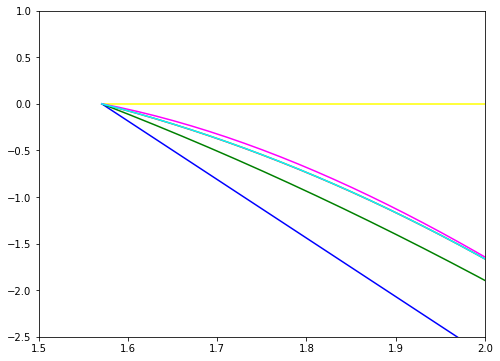

In [176]:
x_arr = np.arange(np.pi/2, np.pi, 0.01)
p = []
y_arr2 = [f(x_i) for x_i in x_arr]
lag_arr1 = []
lag_arr2 = []
lag_arr3 = []
lag_arr4 = []
lag_arr5 = []
for x_i in x_arr: 
    lag_arr1.append(lagrange(arr[0], y_arr[0], x_i))
    lag_arr2.append(lagrange(arr[1], y_arr[1], x_i))
    lag_arr3.append(lagrange(arr[2], y_arr[2], x_i))
    lag_arr4.append(lagrange(arr[3], y_arr[3], x_i))
    lag_arr5.append(lagrange(arr[4], y_arr[4], x_i))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_arr, y_arr2, color = 'red')
ax.plot(x_arr, lag_arr1, color = 'yellow')
ax.plot(x_arr, lag_arr2, color = 'blue')
ax.plot(x_arr, lag_arr3, color = 'green')
ax.plot(x_arr, lag_arr4, color = 'magenta')
ax.plot(x_arr, lag_arr5, color = 'cyan')

plt.ylim(-2.5, 1)  
plt.xlim(1.5, 2)
#plt.axhline(0, color='black')
#plt.axvline(0, color='black')

As we can see while looking closely, the plot of lagrange polynomial with 4 points is almost equal to the original plot (so close that we can't see the difference). Other polynomials are close enough, except for the one which interpolates based on 1 point.

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

In [180]:
def chebyshev_nodes(m):
    return [np.cos(((2*k+1)/(2*m))*np.pi) for k in range(m)]

Let's test our function on some $m$ and see that after scaling we still get a grid of Chebyshev's nodes

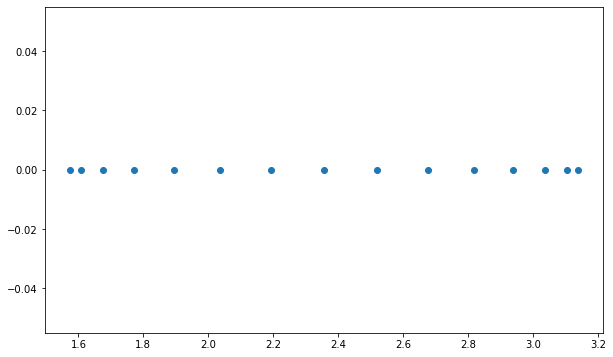

In [202]:
x_cheb = chebyshev_nodes(15)
#print("nodes before scaling:", x_cheb)
x_cheb_scaled = [(3*np.pi)/4 + (np.pi/4)*x_c for x_c in x_cheb]
#print("nodes after scaling:", x_cheb_scaled)
fig, ax = plt.subplots(figsize= (10,6))
x_cheb_scaled = np.asarray(x_cheb_scaled)
y_cheb = np.zeros(x_cheb_scaled.shape)
ax.scatter(x_cheb_scaled, y_cheb)

In [ ]:
cheb_arr3 = []
for x_c in x_cheb_scaled: 
    cheb_arr3.append(lagrange(arr[0], y_arr[0], x_i))
x_new = (3*np.pi)/4 + (np.pi/)*0.5
    
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(x_arr, lag_arr3, color = 'green')

In [188]:
(3*np.pi)/4 + (np.pi/2)*0


3.7699111843077517